<a href="https://colab.research.google.com/github/meantaraa/OIBSIP/blob/main/iris_flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [26]:
iris = datasets.load_iris()

In [27]:
X = iris.data    # Features (sepal length, sepal width, petal length, petal width)
y = iris.target  # Labels (Setosa, Versicolor, Virginica)


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [30]:
y_pred = model.predict(X_test)

In [31]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 1.0


In [32]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [33]:
class_report = classification_report(y_test, y_pred, target_names=iris.target_names)
print(f"Classification Report:\n{class_report}")

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



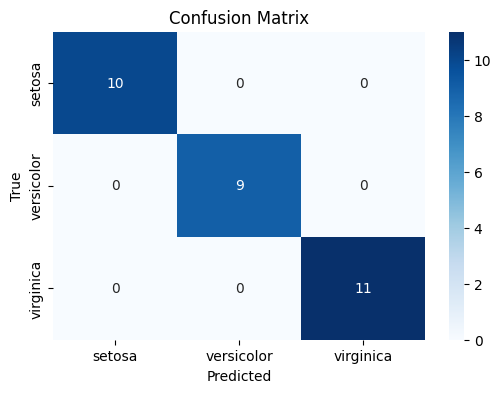

In [34]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

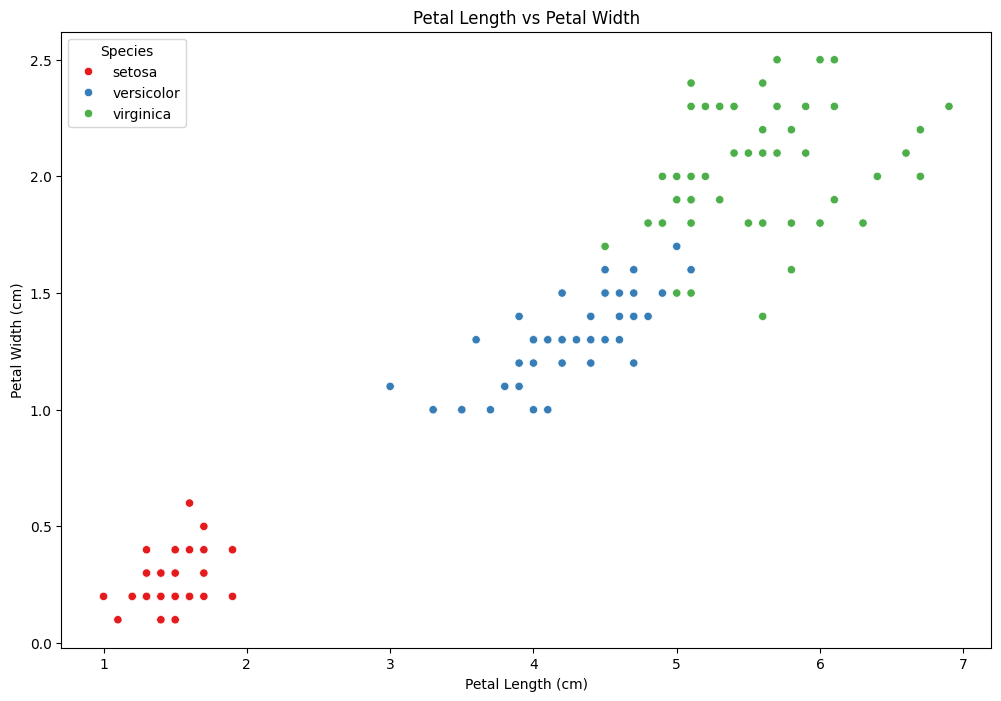

In [35]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X[:, 2], y=X[:, 3], hue=iris.target_names[y], palette='Set1')
plt.title("Petal Length vs Petal Width")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend(title="Species")
plt.show()

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
cv_scores = cross_val_score(model, X, y, cv=5)
print("\nCross-Validation Scores: ", cv_scores)
print("Mean Accuracy: ", np.mean(cv_scores))
print("Standard Deviation: ", np.std(cv_scores))



Cross-Validation Scores:  [0.96666667 1.         0.93333333 0.96666667 1.        ]
Mean Accuracy:  0.9733333333333334
Standard Deviation:  0.02494438257849294


In [38]:
from sklearn.model_selection import learning_curve

In [39]:
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, n_jobs=-1,
                                                        train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1301, in fit
    raise ValueError(
ValueError: This solver needs samples of at least 2 cl

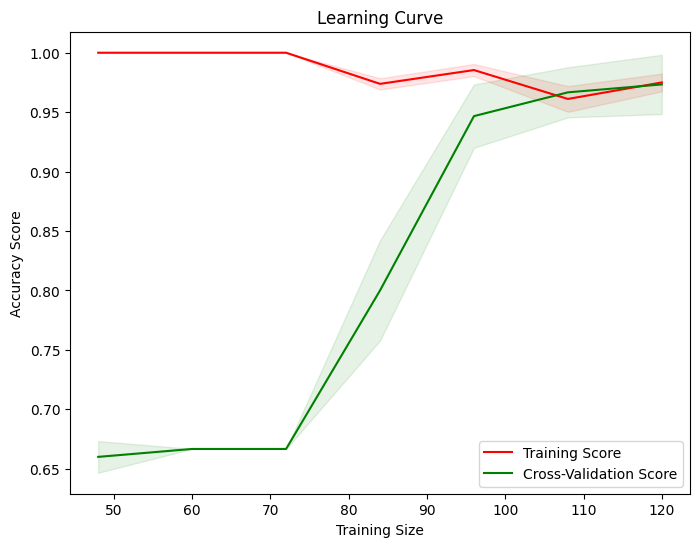

In [41]:
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label="Training Score", color="r")
plt.plot(train_sizes, test_scores_mean, label="Cross-Validation Score", color="g")
plt.fill_between(train_sizes, train_scores_mean - np.std(train_scores, axis=1),
                 train_scores_mean + np.std(train_scores, axis=1), alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - np.std(test_scores, axis=1),
                 test_scores_mean + np.std(test_scores, axis=1), alpha=0.1, color="g")
plt.title("Learning Curve")
plt.xlabel("Training Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.show()
